# 4.2 일변량 시각화
## 일변량 시각화
하나의 변수로 구성된 데이터를 전체적인 관점으로 파악할 수 있는 데이터 탐색 유형  
=> **단일 변수 데이터를 다양한 그래프로 시각화**하여 전체적인 관점으로 살펴보는 것이 목적

## 시각화 특징
|시각화|비시각화|
|---|---|
|직관적 이해 추구<br>정보 전달 시간 단축|효과적인 데이터 요약<br>빠른 데이터 성격 파악|

## 범주형 시각화
### 1. 파이차트
- 비율파악을 용이하게 할 수 있음
- 시각적 전달 효과가 떨어지는 경우 : 범주 별 빈도가 유사한 경우, 범주 수가 많은 경우
### 2. 막대그래프
- 범주의 수가 많거나 범주 별 크기가 유사할 경우에 비교 수월
- 범주 별 비교는 막대그래프 기반의 파악이 비교적 수월함
## 연속형 시각화
### 1. 히스토그램
- 관측된 연속형 데이터 값들의 **분포 파악 가능**
- 구간 별 분포 상태를 쉽게 알아 볼 수 있는 그래프
- **구간 내 속하는 자료의 수가 많고 적음을 쉽게 파악**
- 막대그래프와 유사한 형태를 보유
    - 히스토그램은 연속형 변수의 빈도 분포를 표현
    - 막대그래프는 범주형 (이산형 포함) 변수의 빈도표 비교 표현
### 2. 커널밀도추정
- 관측된 연속형 데이터 값들의 분포를 분석하여 연속성 있는 확률 밀도 함수를 추정
- 관측된 데이터로부터 변수가 가질 수 있는 모든 값의 확률(밀도)을 추정하는 것
- 히스토그램의 한계점을 극복하기 위해 고안된 방안
    1. 구간 경계가 연속적이지 않음
    2. 구간 크기 및 시작 위치에 따라 분포가 다르게 나타남
    3. 고차원 데이터에 대한 메모리 문제 발생 가능성 존재

### 3. 팍스플롯
- 연속형 데이터의 양상을 직관적으로 파악할 수 있는 방안으로 5가지 요약치를 기반으로 생성되며 **다양한 정보를 손쉽게 표현**
    1. 중앙값
    2. 1분위수
    3. 3분위수
    4. 최대값 (IQR Value)
    5. 최소값 (IQR Value)
- 데이터의 개략적인 흩어짐의 형태 파악 및 IQR 기반의 이상치 판단에 용이함

## 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    data = load_boston()


In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['MEDV'])

housing = pd.merge(X, y, left_index=True, right_index=True, how='inner')

housing_data = housing.copy()

### 범주형 일변량 시각화
- 파이차트
- 막대그래프
#### 파이차트

In [4]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
bins = [0, 20, 40, 60, 80, 100]
names = ['G1', 'G2', 'G3', 'G4', 'G5']
housing_data['AGE_G5'] = pd.cut(housing_data['AGE'], bins, labels=names)
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_G5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,G4
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,G4
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,G4
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,G3
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,G3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,G4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,G4
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,G5
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,G5


In [6]:
pie_df_G5 = pd.DataFrame(housing_data['AGE_G5'].value_counts())
pie_df_G5

,AGE_G5
G5,240
G4,81
G3,76
G2,75
G1,34


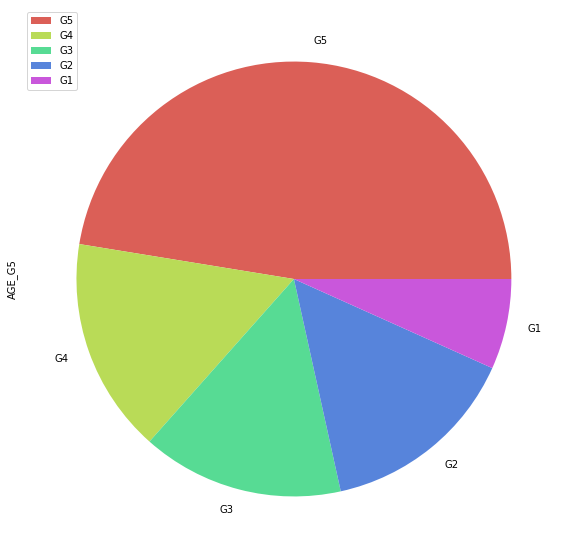

In [7]:
pie_df_G5.plot.pie(y='AGE_G5', figsize=(10, 10), colors=sns.color_palette('hls', len(pie_df_G5)))
plt.show()

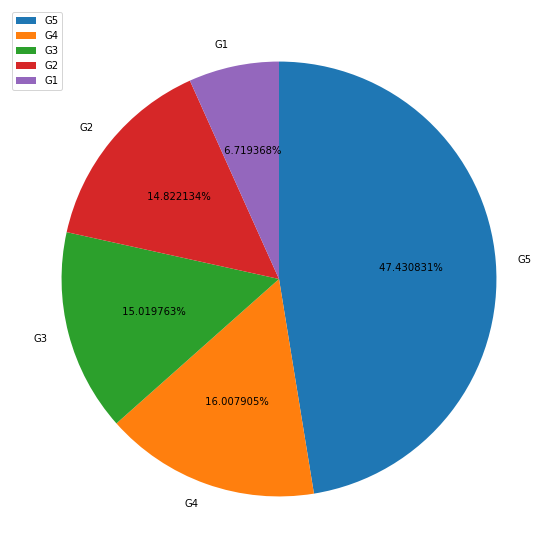

In [8]:
plt.figure(figsize=(10, 10))
plt.pie(pie_df_G5['AGE_G5'], labels=pie_df_G5.index, startangle=90, counterclock=False, autopct='% 2f%%')
plt.legend()
plt.show()

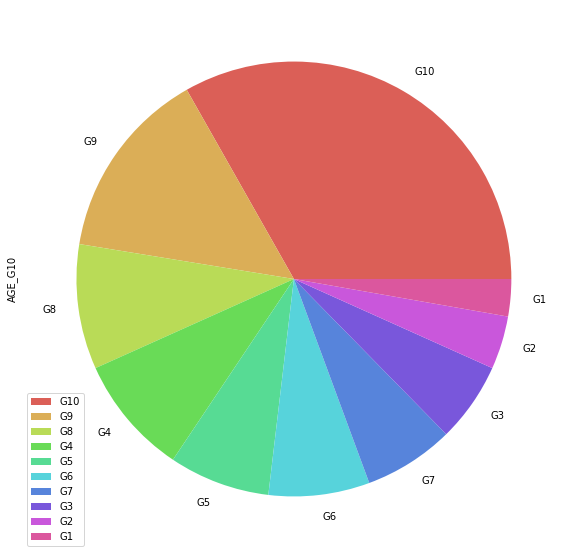

In [9]:
bins = list(np.linspace(0, 100, 11).astype(int))
names = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
housing_data['AGE_G10'] = pd.cut(housing_data['AGE'], bins, labels=names)

pie_df_G10 = pd.DataFrame(housing_data['AGE_G10'].value_counts())

pie_df_G10.plot.pie(y='AGE_G10', figsize=(10, 10), colors=sns.color_palette('hls', len(pie_df_G10)))
plt.show()

- 5개의 범주인 경우보다, 범주 별 비교가 어려움을 보임
- 또한, G4~G7까지 대부분 비율이 유사하게 보이므로 비교가 쉽지 않음
- 데이터 크기가 유사할 경우, 막대그래프를 통해 크기 차이를 비교할 수 있음
#### 막대그래프

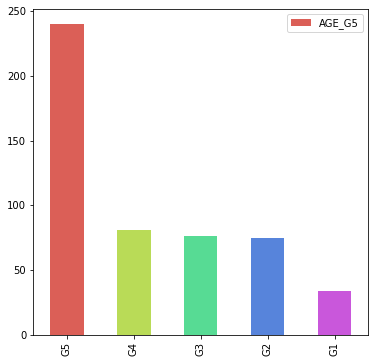

In [13]:
pie_df_G5.plot.bar(y='AGE_G5', figsize=(6, 6), color=sns.color_palette('hls', len(pie_df_G5)))
plt.show()

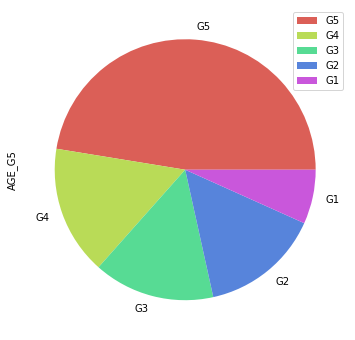

In [15]:
pie_df_G5.plot.pie(y='AGE_G5', figsize=(6, 6), colors=sns.color_palette('hls', len(pie_df_G5)))
plt.show()

- G4, G3, G2의 비교가 어려운 파이차트 대비 막대그래프에서는 비교적 빈도 크기 비교가 수월함

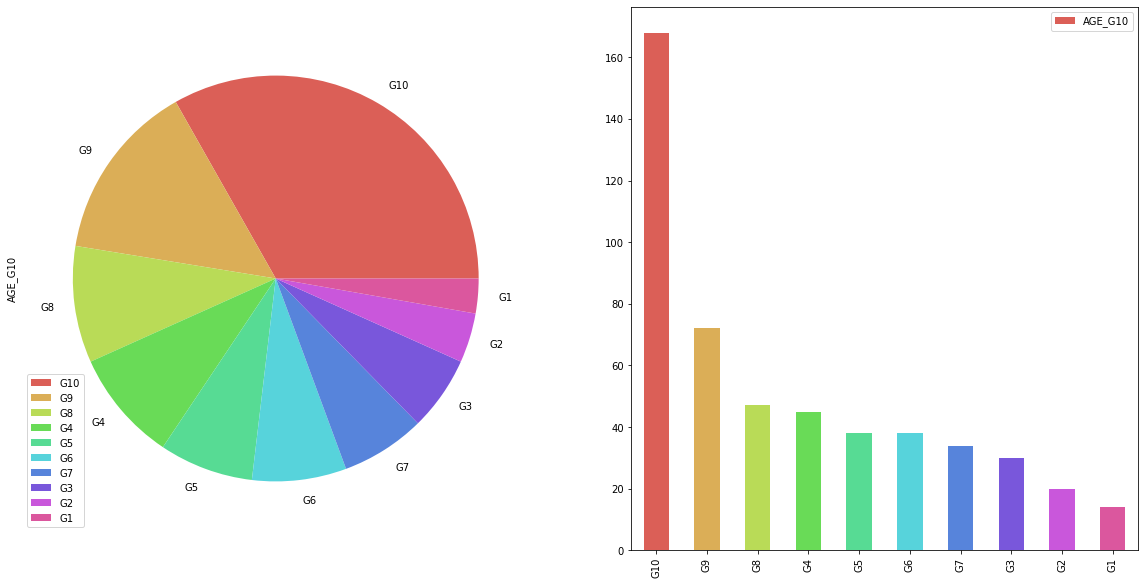

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

pie_df_G10.plot.pie(y='AGE_G10', colors=sns.color_palette('hls', len(pie_df_G10)), ax=ax[0])
pie_df_G10.plot.bar(y='AGE_G10', color=sns.color_palette('hls', len(pie_df_G10)), ax=ax[1])
plt.show()

In [21]:
pie_df_G10

,AGE_G10
G10,168
G9,72
G8,47
G4,45
G5,38
G6,38
G7,34
G3,30
G2,20
G1,14


### 연속형 일변량 시각화
- 히스토그램
- 커널밀도그래프
- 박스플롯
#### 히스토그램

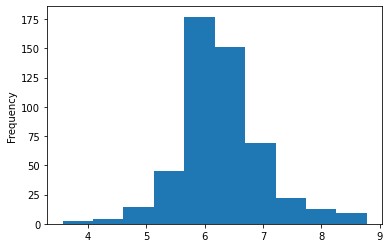

In [22]:
housing_data['RM'].plot.hist()
plt.show()

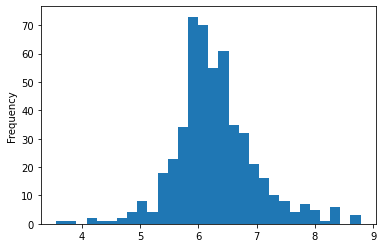

In [23]:
housing_data['RM'].plot.hist(bins=30)
plt.show()

#### 커널밀도추정 시각화

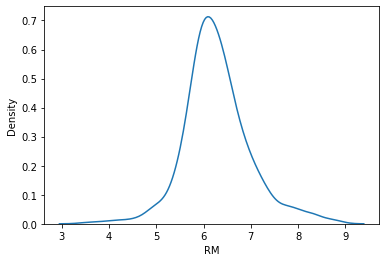

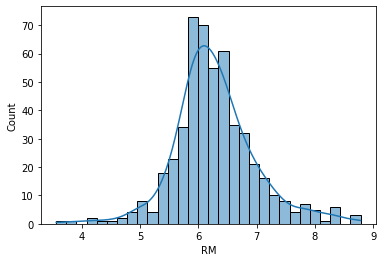

In [25]:
sns.kdeplot(housing_data['RM'])
plt.show()

sns.histplot(housing_data['RM'], bins=30, kde=True)
plt.show()

- 관측된 RM 변수를 기반으로 커널밀도 추정 결과의 시각화
- 히스토그램 분포를 완만한 곡선으로 표현

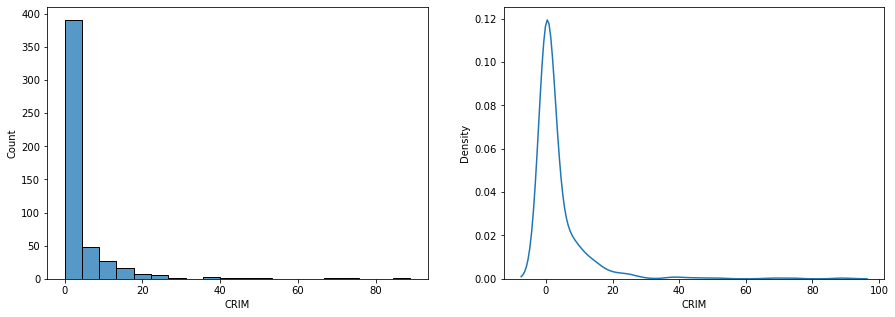

In [26]:
# CRIM 변수 시각화
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

sns.histplot(housing_data['CRIM'], bins=20, ax=ax[0])
sns.kdeplot(housing_data['CRIM'], ax=ax[1])

plt.show()

- CRIM 컬럼의 왜도 첨도 확인 결과, 왼쪽으로 치우쳐 있고 뾰족한 모양의 분포
- 시각화를 통해 실제 데이터 분포 형상 파악 수월

##### 박스플롯

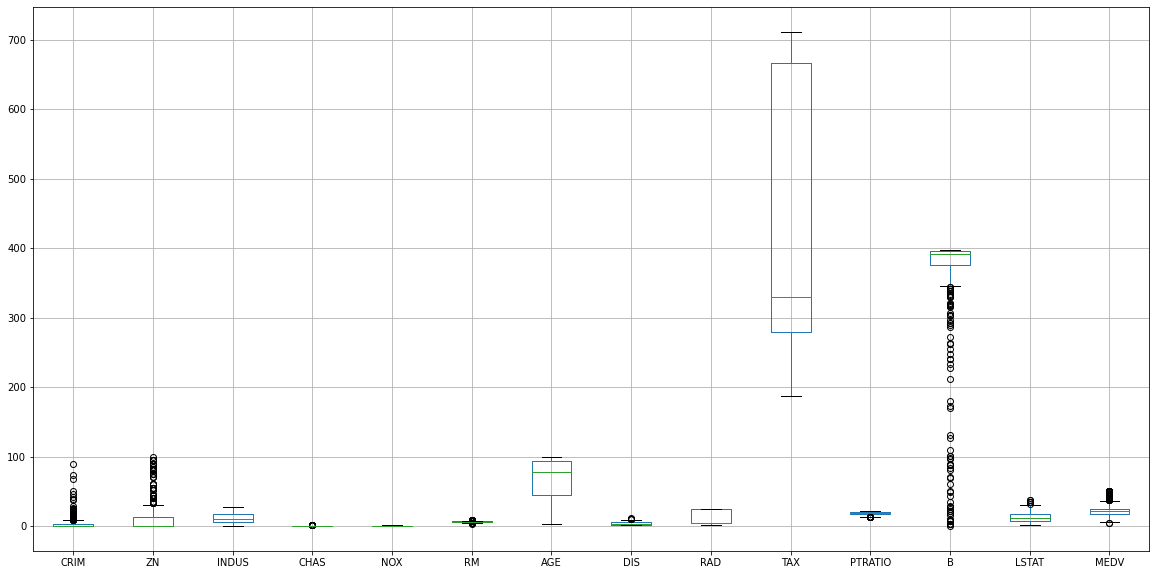

In [27]:
housing_data.boxplot(figsize=(20, 10))
plt.show()

- 변수 별 관측치 범위가 모두 다르기 때문에, 개략적 파악 가능
- 개별 변수 별 Box plot 시각화 필요

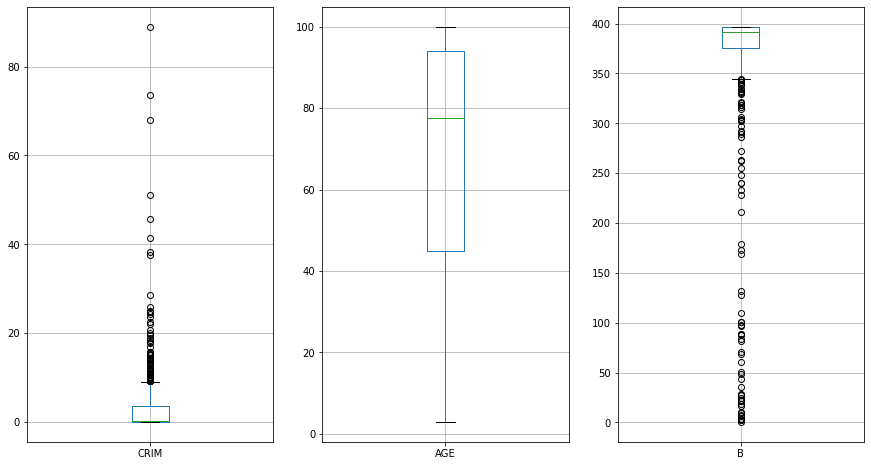

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64


In [28]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 8))

housing_data[['CRIM']].boxplot(ax=ax[0])
housing_data[['AGE']].boxplot(ax=ax[1])
housing_data[['B']].boxplot(ax=ax[2])

plt.show()

print(housing_data['AGE'].describe())

In [29]:
q1=housing_data['AGE'].quantile(0.25)
q3=housing_data['AGE'].quantile(0.75)
iqr=q3-q1
print('minimum :', q1-1.5*iqr)
print('maximum :', q3+1.5*iqr)

minimum : -28.54999999999999
maximum : 167.64999999999998
